# Clustering
While classification predicts specific categories (like "smoker" vs "non-smoker"), clustering finds natural groupings in data without predefined labels.

## Clustering Types

### Centroid-based Clustering
#### E.g. K-means

Characteristics:

Based on distance to centroids

Needs number of clusters specified

Good for spherical clusters

Fast and scalable


Use when: Data has roughly spherical clusters and you know how many clusters you want

![K Means](https://media.licdn.com/dms/image/v2/D4D12AQFL94cG7oZCvw/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1712163695670?e=1742428800&v=beta&t=AZdV36Ihqwo4mZBDUiG6TAehY0s5yuwZ3VEXZqncJEA)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

### Load and prepare data

In [4]:
np.random.seed(42)
n_samples = 200

# Generate synthetic customer data
age = np.random.normal(35, 10, n_samples)
spending_score = np.random.normal(50, 20, n_samples)

In [5]:
# Create some natural clusters by adding biased samples
age = np.concatenate([age, 
                     np.random.normal(25, 5, 50),  # Young, high spenders
                     np.random.normal(55, 5, 50)]) # Older, moderate spenders
spending_score = np.concatenate([spending_score,
                               np.random.normal(80, 10, 50),  # High spending
                               np.random.normal(40, 10, 50)]) # Moderate spending

In [6]:
df = pd.DataFrame({
    'Age': age,
    'SpendingScore': spending_score
})

In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(features_scaled, columns=df.columns)

Visualize the dataset

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SpendingScore'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Data')
plt.show()

In [20]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeansCluster'] = kmeans.fit_predict(df_scaled)

/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
var = kmeans.fit_predict(df_scaled)
var

/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 2, 1, 4, 0, 0, 3, 0, 3, 0, 3, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 4, 1, 2, 0, 3, 1, 2, 2, 0, 1, 1, 0, 0,
       2, 2, 2, 1, 0, 3, 1, 0, 3, 0, 1, 1, 3, 1, 0, 0, 2, 1, 2, 2, 1, 4,
       3, 1, 1, 2, 0, 4, 0, 4, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 3, 2, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 3, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 4, 0, 1, 0, 2, 0, 1, 1, 3, 4, 3, 1, 4, 3, 0, 0, 0, 2, 1,
       2, 1, 3, 4, 2, 1, 0, 2, 1, 4, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 3, 1,
       1, 2, 4, 1, 2, 1, 3, 0, 4, 0, 0, 1, 0, 4, 0, 2, 2, 0, 0, 0, 3, 1,
       0, 4, 3, 4, 1, 2, 2, 1, 1, 1, 0, 3, 3, 2, 2, 0, 1, 3, 0, 1, 2, 0,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], d

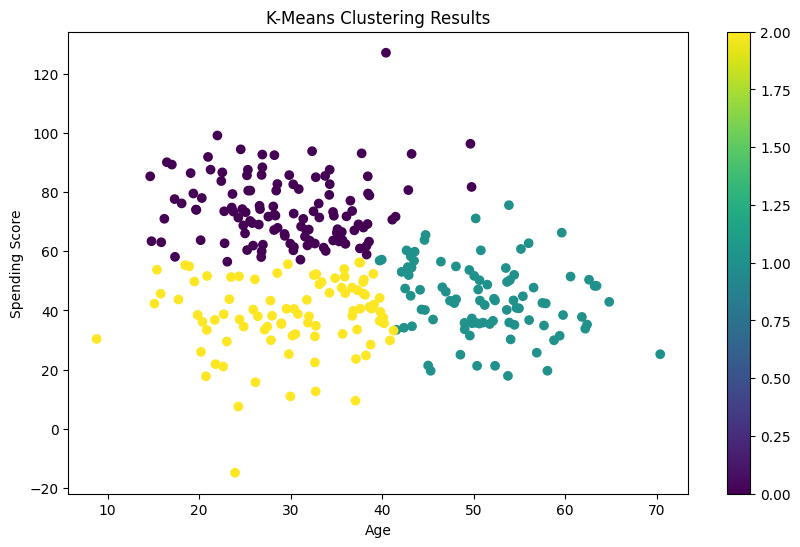

In [21]:
# Visualize K-means results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['SpendingScore'], 
                     c=df['KMeansCluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering Results')
plt.colorbar(scatter)
plt.show()

Now how do you find the optimal k. 

/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adityaganguli/.pyenv/versions/3.8.16/en

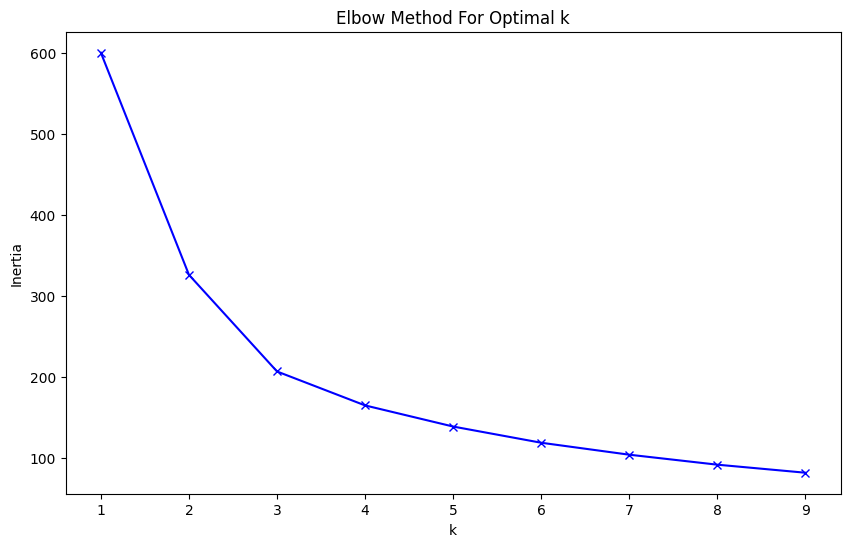

In [19]:
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## Hierarchical Clustering

Types: Agglomerative (bottom-up) and Divisive (top-down)

Characteristics:

Creates tree-like hierarchy of clusters

No need to specify clusters upfront

Can visualize with dendrogram

Slower than K-means


Use when: You want to understand the hierarchy of relationships in your data

![Hierarchial](https://i0.wp.com/analyticsarora.com/wp-content/uploads/2022/07/hierarchical-agglomerative-clustering-diagram-dendrogram.png?w=800&ssl=1)

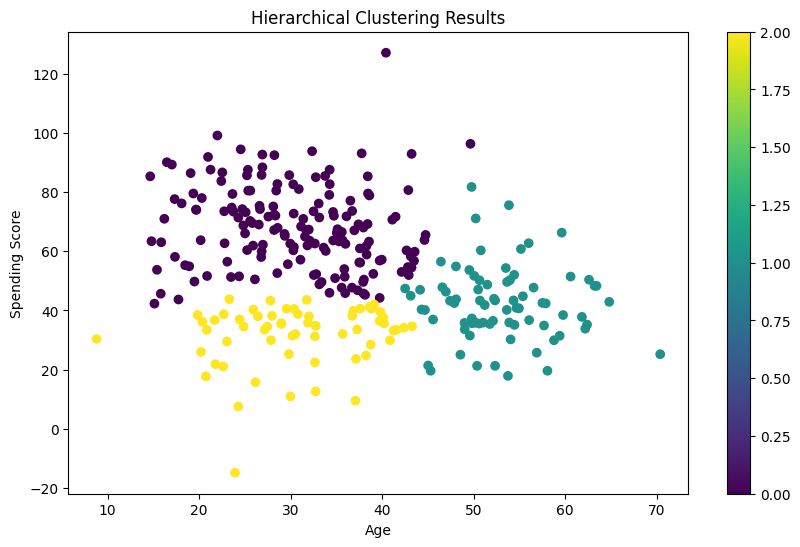

In [22]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['HierarchicalCluster'] = hierarchical.fit_predict(df_scaled)

# Visualize hierarchical clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['SpendingScore'], 
                     c=df['HierarchicalCluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter)
plt.show()

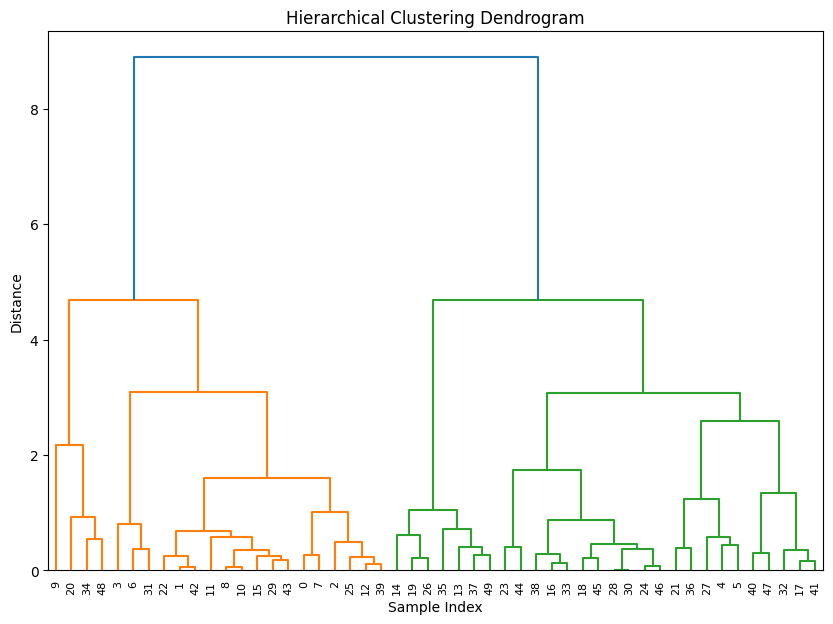

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix
# Using only a subset of data for clarity
sample_data = df_scaled.iloc[:50]
linkage_matrix = linkage(sample_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Nodes:

The leaf nodes at the bottom represent individual data points (your original observations)
Internal nodes represent where clusters merge together

### Branches:

The vertical lines show which clusters are being connected
The height of the horizontal lines (y-axis) represents the distance or dissimilarity between clusters
The higher up in the tree a merger occurs, the more dissimilar the merged clusters are
